In [63]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.applications import resnet
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from tensorflow.keras import layers, models
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
from skimage.util import random_noise
import os
from tqdm import tqdm
from PIL import Image


In [2]:
input_folder = 'C:\\Users\\Paras\\ML\\MONKE\\dataset\\Monkeypox Skin Image Dataset\\Monkeypox Skin Image Dataset\\Chickenpox'
output_folder = 'C:\\Users\\Paras\\ML\\MONKE\\dataset\\Monkeypox Skin Image Dataset\\Monkeypox Skin Image Dataset\\Chickenpox_AUG'


def add_gaussian_noise(X_img):
    row, col, _ = X_img.shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    gaussian = np.random.random((row, col, 1)).astype(np.float32)
    gaussian = np.concatenate((gaussian, gaussian, gaussian), axis=2)
    gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
    return gaussian_img

def apply_color_filter(X_img):
    # Randomly choose a color filter
    color_filter = np.random.uniform(0.5, 1.5, 3)
    colored_img = X_img * color_filter
    return np.clip(colored_img, 0.0, 255.0)


if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create an ImageDataGenerator with careful augmentation parameters
datagen = image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=60,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Iterate over each image in the input folder
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)

    # Load the image using PIL
    img = Image.open(image_path)
    
    # Resize the image if needed (optional)
    # img = img.resize((target_height, target_width))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels)

    # Generate 30 augmented images (15 with noise, 10 with color filter, 5 without noise or color filter)
    for i in range(30):
        # Generate augmented images and save to the output folder
        augmented_img = next(datagen.flow(x, batch_size=1))[0]

        if i < 15:
            # Add Gaussian noise to the first 15 images
            augmented_img = add_gaussian_noise(augmented_img)
        elif i < 25:
            # Apply color filter to the next 10 images
            augmented_img = apply_color_filter(augmented_img)

        augmented_img_name = f"{os.path.splitext(image_file)[0]}_aug_{i}.jpeg"
        augmented_img_path = os.path.join(output_folder, augmented_img_name)

        # Save the augmented image
        if not os.path.exists(os.path.dirname(augmented_img_path)):
            os.makedirs(os.path.dirname(augmented_img_path))
        image.array_to_img(augmented_img).save(augmented_img_path)

C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


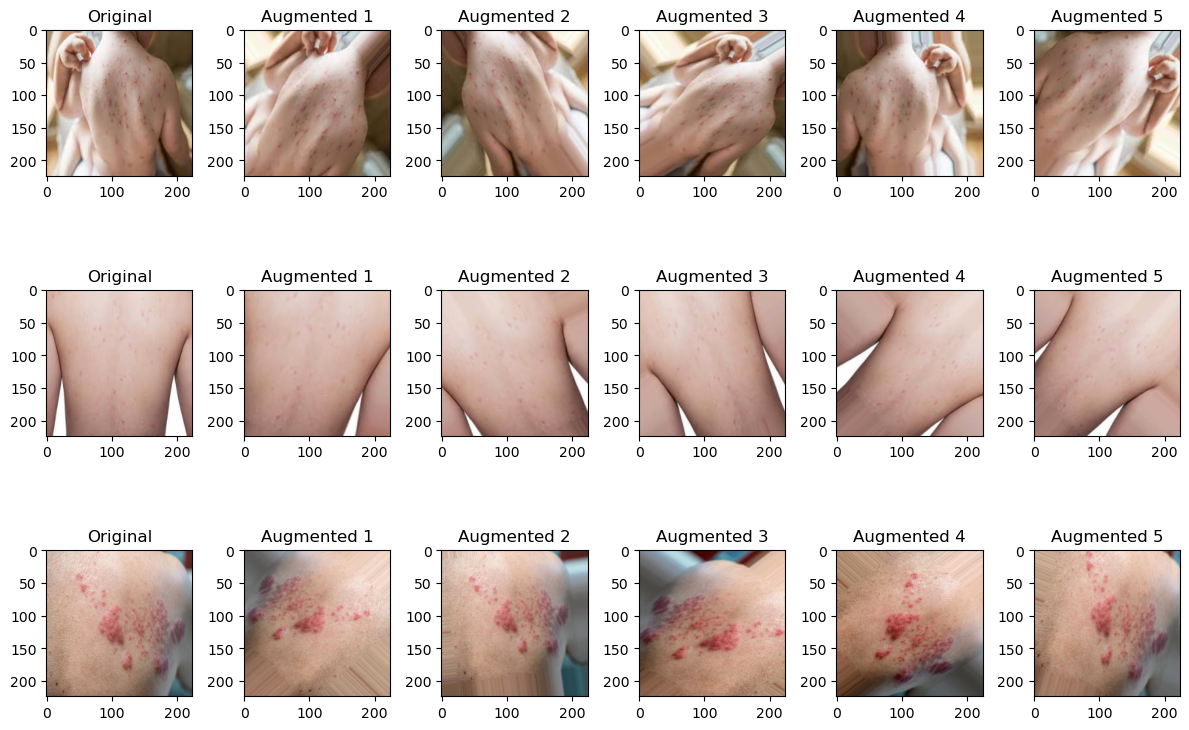

In [3]:

image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

plt.figure(figsize=(12, 8))

for i in range(3):
    original_img_path = os.path.join(input_folder, image_files[i])
    augmented_img_paths = [
        os.path.join(output_folder, f'{image_files[i][:-4]}_aug_{j}.jpeg') for j in range(5)
    ]

    # Display original image
    plt.subplot(3, 6, i * 6 + 1)
    original_img = image.load_img(original_img_path)
    plt.imshow(original_img)
    plt.title('Original')

    # Display augmented images
    for j, augmented_img_path in enumerate(augmented_img_paths):
        plt.subplot(3, 6, i * 6 + j + 2)
        augmented_img = image.load_img(augmented_img_path)
        plt.imshow(augmented_img)
        plt.title(f'Augmented {j + 1}')

plt.tight_layout()
plt.show()

In [4]:
input_folder = 'C:\\Users\\Paras\\ML\\MONKE\\dataset\\Monkeypox Skin Image Dataset\\Monkeypox Skin Image Dataset\\Measles'
output_folder = 'C:\\Users\\Paras\\ML\\MONKE\\dataset\\Monkeypox Skin Image Dataset\\Monkeypox Skin Image Dataset\\Measles_AUG'

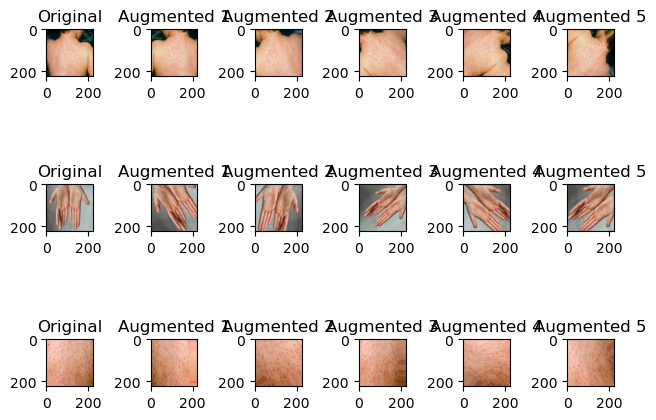

In [5]:


def add_gaussian_noise(X_img):
    row, col, _ = X_img.shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    gaussian = np.random.random((row, col, 1)).astype(np.float32)
    gaussian = np.concatenate((gaussian, gaussian, gaussian), axis=2)
    gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
    return gaussian_img

def apply_color_filter(X_img):
    # Randomly choose a color filter
    color_filter = np.random.uniform(0.5, 1.5, 3)
    colored_img = X_img * color_filter
    return np.clip(colored_img, 0.0, 255.0)


if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create an ImageDataGenerator with careful augmentation parameters
datagen = image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=60,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Iterate over each image in the input folder
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)

    # Load the image using PIL
    img = Image.open(image_path)
    
    # Resize the image if needed (optional)
    # img = img.resize((target_height, target_width))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels)

    # Generate 30 augmented images (15 with noise, 10 with color filter, 5 without noise or color filter)
    for i in range(30):
        # Generate augmented images and save to the output folder
        augmented_img = next(datagen.flow(x, batch_size=1))[0]

        if i < 15:
            # Add Gaussian noise to the first 15 images
            augmented_img = add_gaussian_noise(augmented_img)
        elif i < 25:
            # Apply color filter to the next 10 images
            augmented_img = apply_color_filter(augmented_img)

        augmented_img_name = f"{os.path.splitext(image_file)[0]}_aug_{i}.jpeg"
        augmented_img_path = os.path.join(output_folder, augmented_img_name)

        # Save the augmented image
        if not os.path.exists(os.path.dirname(augmented_img_path)):
            os.makedirs(os.path.dirname(augmented_img_path))
        image.array_to_img(augmented_img).save(augmented_img_path)
        
for i in range(3):
    original_img_path = os.path.join(input_folder, image_files[i])
    augmented_img_paths = [
        os.path.join(output_folder, f'{image_files[i][:-4]}_aug_{j}.jpeg') for j in range(5)
    ]

    # Display original image
    plt.subplot(3, 6, i * 6 + 1)
    original_img = image.load_img(original_img_path)
    plt.imshow(original_img)
    plt.title('Original')

    # Display augmented images
    for j, augmented_img_path in enumerate(augmented_img_paths):
        plt.subplot(3, 6, i * 6 + j + 2)
        augmented_img = image.load_img(augmented_img_path)
        plt.imshow(augmented_img)
        plt.title(f'Augmented {j + 1}')

plt.tight_layout()
plt.show()

In [6]:
input_folder = 'C:\\Users\\Paras\\ML\\MONKE\\dataset\\Monkeypox Skin Image Dataset\\Monkeypox Skin Image Dataset\\Monkeypox'
output_folder = 'C:\\Users\\Paras\\ML\\MONKE\\dataset\\Monkeypox Skin Image Dataset\\Monkeypox Skin Image Dataset\\Monkeypox_AUG'


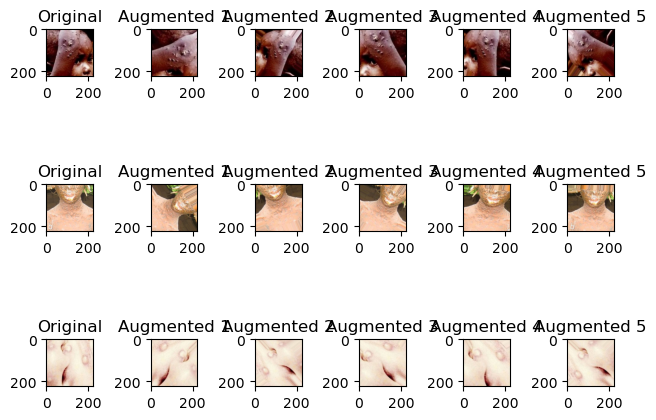

In [7]:

def add_gaussian_noise(X_img):
    row, col, _ = X_img.shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    gaussian = np.random.random((row, col, 1)).astype(np.float32)
    gaussian = np.concatenate((gaussian, gaussian, gaussian), axis=2)
    gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
    return gaussian_img

def apply_color_filter(X_img):
    # Randomly choose a color filter
    color_filter = np.random.uniform(0.5, 1.5, 3)
    colored_img = X_img * color_filter
    return np.clip(colored_img, 0.0, 255.0)


if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create an ImageDataGenerator with careful augmentation parameters
datagen = image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=60,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Iterate over each image in the input folder
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)

    # Load the image using PIL
    img = Image.open(image_path)
    
    # Resize the image if needed (optional)
    # img = img.resize((target_height, target_width))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels)

    # Generate 30 augmented images (15 with noise, 10 with color filter, 5 without noise or color filter)
    for i in range(30):
        # Generate augmented images and save to the output folder
        augmented_img = next(datagen.flow(x, batch_size=1))[0]

        if i < 15:
            # Add Gaussian noise to the first 15 images
            augmented_img = add_gaussian_noise(augmented_img)
        elif i < 25:
            # Apply color filter to the next 10 images
            augmented_img = apply_color_filter(augmented_img)

        augmented_img_name = f"{os.path.splitext(image_file)[0]}_aug_{i}.jpeg"
        augmented_img_path = os.path.join(output_folder, augmented_img_name)

        # Save the augmented image
        if not os.path.exists(os.path.dirname(augmented_img_path)):
            os.makedirs(os.path.dirname(augmented_img_path))
        image.array_to_img(augmented_img).save(augmented_img_path)
for i in range(3):
    original_img_path = os.path.join(input_folder, image_files[i])
    augmented_img_paths = [
        os.path.join(output_folder, f'{image_files[i][:-4]}_aug_{j}.jpeg') for j in range(5)
    ]

    # Display original image
    plt.subplot(3, 6, i * 6 + 1)
    original_img = image.load_img(original_img_path)
    plt.imshow(original_img)
    plt.title('Original')

    # Display augmented images
    for j, augmented_img_path in enumerate(augmented_img_paths):
        plt.subplot(3, 6, i * 6 + j + 2)
        augmented_img = image.load_img(augmented_img_path)
        plt.imshow(augmented_img)
        plt.title(f'Augmented {j + 1}')

plt.tight_layout()
plt.show()

In [8]:
input_folder = 'C:\\Users\\Paras\\ML\\MONKE\\dataset\\Monkeypox Skin Image Dataset\\Monkeypox Skin Image Dataset\\Normal'
output_folder = 'C:\\Users\\Paras\\ML\\MONKE\\dataset\\Monkeypox Skin Image Dataset\\Monkeypox Skin Image Dataset\\Normal_AUG'


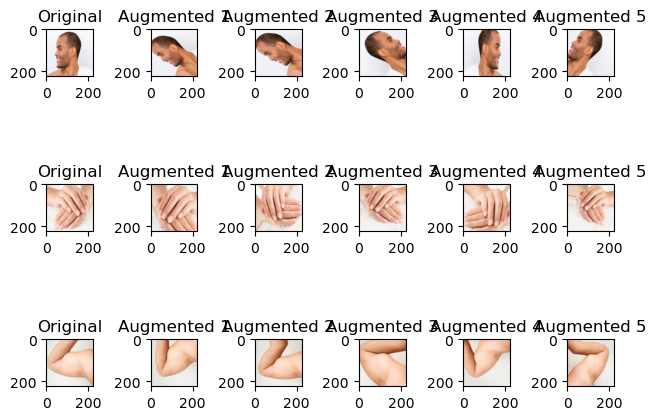

In [9]:

def add_gaussian_noise(X_img):
    row, col, _ = X_img.shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    gaussian = np.random.random((row, col, 1)).astype(np.float32)
    gaussian = np.concatenate((gaussian, gaussian, gaussian), axis=2)
    gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
    return gaussian_img

def apply_color_filter(X_img):
    # Randomly choose a color filter
    color_filter = np.random.uniform(0.5, 1.5, 3)
    colored_img = X_img * color_filter
    return np.clip(colored_img, 0.0, 255.0)


if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create an ImageDataGenerator with careful augmentation parameters
datagen = image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=60,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Iterate over each image in the input folder
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)

    # Load the image using PIL
    img = Image.open(image_path)
    
    # Resize the image if needed (optional)
    # img = img.resize((target_height, target_width))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels)

    # Generate 30 augmented images (15 with noise, 10 with color filter, 5 without noise or color filter)
    for i in range(30):
        # Generate augmented images and save to the output folder
        augmented_img = next(datagen.flow(x, batch_size=1))[0]

        if i < 15:
            # Add Gaussian noise to the first 15 images
            augmented_img = add_gaussian_noise(augmented_img)
        elif i < 25:
            # Apply color filter to the next 10 images
            augmented_img = apply_color_filter(augmented_img)

        augmented_img_name = f"{os.path.splitext(image_file)[0]}_aug_{i}.jpeg"
        augmented_img_path = os.path.join(output_folder, augmented_img_name)

        # Save the augmented image
        if not os.path.exists(os.path.dirname(augmented_img_path)):
            os.makedirs(os.path.dirname(augmented_img_path))
        image.array_to_img(augmented_img).save(augmented_img_path)
for i in range(3):
    original_img_path = os.path.join(input_folder, image_files[i])
    augmented_img_paths = [
        os.path.join(output_folder, f'{image_files[i][:-4]}_aug_{j}.jpeg') for j in range(5)
    ]

    # Display original image
    plt.subplot(3, 6, i * 6 + 1)
    original_img = image.load_img(original_img_path)
    plt.imshow(original_img)
    plt.title('Original')

    # Display augmented images
    for j, augmented_img_path in enumerate(augmented_img_paths):
        plt.subplot(3, 6, i * 6 + j + 2)
        augmented_img = image.load_img(augmented_img_path)
        plt.imshow(augmented_img)
        plt.title(f'Augmented {j + 1}')

plt.tight_layout()
plt.show()

#
Model Training

In [13]:
dataset_path = 'C:/Users/Paras/ML/MONKE/AUG dataset'

# Create a data generator without additional augmentation (you can adjust parameters as needed)
datagen = ImageDataGenerator(rescale=1./255)

# Create a data generator
batch_size = 32
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Adjust the target size as needed
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

Found 24528 images belonging to 4 classes.


In [17]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create your custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(data_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train your model
num_epochs = 10
model.fit(data_generator, epochs=num_epochs)


Epoch 1/10
767/767 [==============================] - 137s 165ms/step - loss: 0.3880 - accuracy: 0.8595
Epoch 2/10
767/767 [==============================] - 98s 127ms/step - loss: 0.2072 - accuracy: 0.9231
Epoch 3/10
767/767 [==============================] - 98s 127ms/step - loss: 0.1540 - accuracy: 0.9425
Epoch 4/10
767/767 [==============================] - 98s 128ms/step - loss: 0.1215 - accuracy: 0.9554
Epoch 5/10
767/767 [==============================] - 98s 128ms/step - loss: 0.1049 - accuracy: 0.9614
Epoch 6/10
767/767 [==============================] - 98s 128ms/step - loss: 0.0880 - accuracy: 0.9675
Epoch 7/10
767/767 [==============================] - 98s 127ms/step - loss: 0.0843 - accuracy: 0.9679
Epoch 8/10
767/767 [==============================] - 97s 127ms/step - loss: 0.0737 - accuracy: 0.9738
Epoch 9/10
767/767 [==============================] - 97s 127ms/step - loss: 0.0625 - accuracy: 0.9771
Epoch 10/10
767/767 [==============================] - 97s 127ms/step - 

In [18]:
model.save('densenet121_model.h5')

In [21]:
from tensorflow.keras.models import load_model

In [61]:

train_dir = 'C:/Users/Paras/ML/MONKE/dataset/Monkeypox Skin Image Dataset/Monkeypox Skin Image Dataset'

# Create ImageDataGenerators
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.4)

# Load your data with a validation split
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use training subset for training data
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use validation subset for validation data
)

# Get predictions
X_val, y_true = next(validation_generator)
y_pred = loaded_model.predict(X_val)

# Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Found 464 images belonging to 4 classes.
Found 306 images belonging to 4 classes.
1/1 [==============================] - 0s 37ms/step
Accuracy: 0.9688
Precision: 0.9766
Recall: 0.9688


Epoch 1/10
15/15 [==============================] - 16s 1s/step - loss: 0.0452 - accuracy: 0.9828 - val_loss: 0.0390 - val_accuracy: 0.9869
Epoch 2/10
15/15 [==============================] - 7s 494ms/step - loss: 0.0584 - accuracy: 0.9784 - val_loss: 0.0126 - val_accuracy: 0.9967
Epoch 3/10
15/15 [==============================] - 7s 483ms/step - loss: 0.0607 - accuracy: 0.9720 - val_loss: 0.0122 - val_accuracy: 0.9935
Epoch 4/10
15/15 [==============================] - 7s 470ms/step - loss: 0.0587 - accuracy: 0.9763 - val_loss: 0.0129 - val_accuracy: 0.9935
Epoch 5/10
15/15 [==============================] - 7s 476ms/step - loss: 0.0387 - accuracy: 0.9892 - val_loss: 0.0199 - val_accuracy: 0.9902
Epoch 6/10
15/15 [==============================] - 7s 485ms/step - loss: 0.0579 - accuracy: 0.9784 - val_loss: 0.0388 - val_accuracy: 0.9869
Epoch 7/10
15/15 [==============================] - 7s 456ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0193 - val_accuracy: 0.9967
Epoch 8/

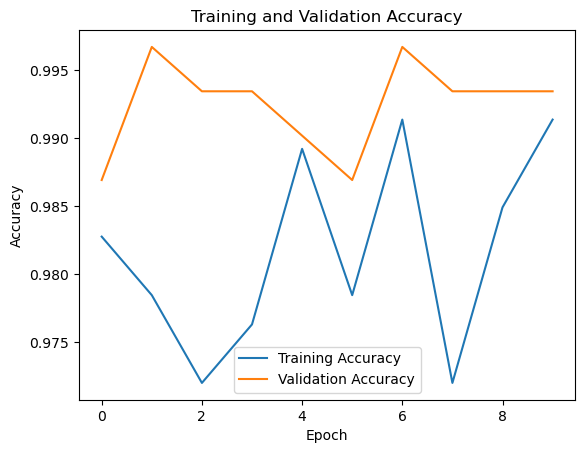

In [62]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
